**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/parsing-dates).**

---


In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [43]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [44]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [45]:
# TODO: Your code here!
earthquakes.head(10)


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [46]:
print(earthquakes['Date'].head(10))


0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
5    01/10/1965
6    01/12/1965
7    01/15/1965
8    01/16/1965
9    01/17/1965
Name: Date, dtype: object


In [47]:
# check the data type of date column
earthquakes['Date'].dtype

dtype('O')

Once you have answered the question above, run the code cell below to get credit for your work.

In [48]:
# Check your answer (Run this code cell to receive credit!)
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The "Date" column in the `earthquakes` DataFrame does have dates.  The dtype is "object".

In [49]:
# Line below will give you a hint
q1.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `earthquakes['Date'].head()` to check that the column contains dates and verify that it has dtype "object".  You can also use `earthquakes['Date'].dtype` to verify the dtype.

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [50]:
earthquakes[3378:3393]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed
3383,02/26/1975,08:00:05,40.085,24.697,Earthquake,34.0,NaN,NaN,5.5,ML,...,NaN,NaN,NaN,NaN,NaN,USP0000A1M,US,US,BRK,Reviewed
3384,02/26/1975,14:29:01,-6.529,154.932,Earthquake,54.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A1R,US,US,US,Reviewed
3385,02/26/1975,20:15:00,-19.795,-69.271,Earthquake,82.0,NaN,NaN,5.7,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A1X,US,US,US,Reviewed
3386,02/27/1975,14:23:59,-6.098,148.235,Earthquake,78.0,NaN,NaN,5.9,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A28,US,US,US,Reviewed
3387,02/27/1975,18:42:54,-17.862,-178.580,Earthquake,586.0,NaN,NaN,5.9,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A2B,US,US,US,Reviewed


This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [51]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [52]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [65]:
# TODO: Your code here
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650,"Date"] = "03/13/2011"

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
# Check your answer


In [66]:
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [63]:
# Lines below will give you a hint or solution code
q2.hint()
q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Since there are only three rows with a fancy type, you might consider manually editing them. For instance, you can begin by setting `earthquakes.loc[3378, "Date"] = "02/23/1975"`.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python

earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

```

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [68]:
# try to get the day of the month from the date column
day_of_month_earthquakes =  earthquakes['date_parsed'].dt.day
day_of_month_earthquakes.head()

# Check your answer
#q3.check()

0    2
1    4
2    5
3    8
4    9
Name: date_parsed, dtype: int64

In [57]:
# Lines below will give you a hint or solution code
#q3.hint()
#q3.solution()

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

<AxesSubplot:xlabel='date_parsed'>

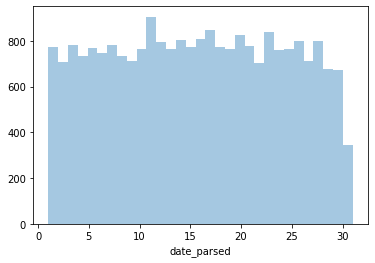

In [71]:
# TODO: Your code here!
day_of_month_landslides = day_of_month_earthquakes.dropna()
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

Does the graph make sense to you?

In [72]:
# Check your answer (Run this code cell to receive credit!)
q4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The graph should make sense: it shows a relatively even distribution in days of the month,which is what we would expect.

In [60]:
# Line below will give you a hint
#q4.hint()

# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [73]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [62]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object

# (Optional) More practice

If you're interested in graphing time series, [check out this tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

# Keep going

In the next lesson, learn how to [**work with character encodings**](https://www.kaggle.com/alexisbcook/character-encodings).

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/172650) to chat with other Learners.*